In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('HFU.xlsx')

In [3]:
df.head()

,Porosity(%),Klinkenberg-K(mD),K-Air(mD),Grain Density(g/cm3),Sample
0,9.6,0.005,0.008,2.75,1
1,7.0,0.002,0.004,2.72,2
2,11.5,0.010,0.020,2.71,3
3,8.6,0.004,0.006,2.70,4
4,7.7,0.003,0.007,2.73,5


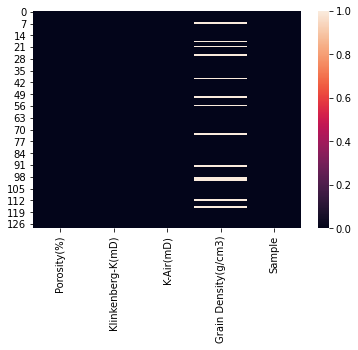

In [4]:
sns.heatmap(df.isnull())

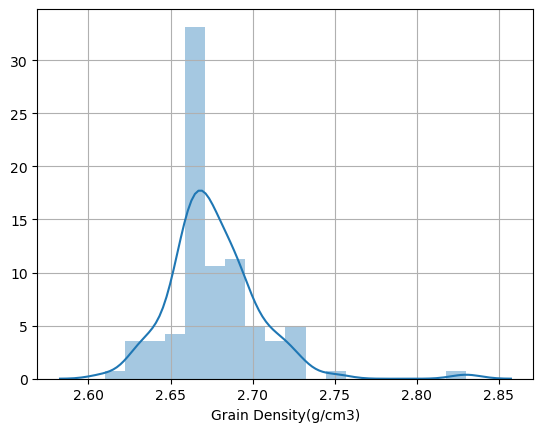

In [5]:
plt.style.use('default')
sns.distplot(df['Grain Density(g/cm3)'])
plt.grid()

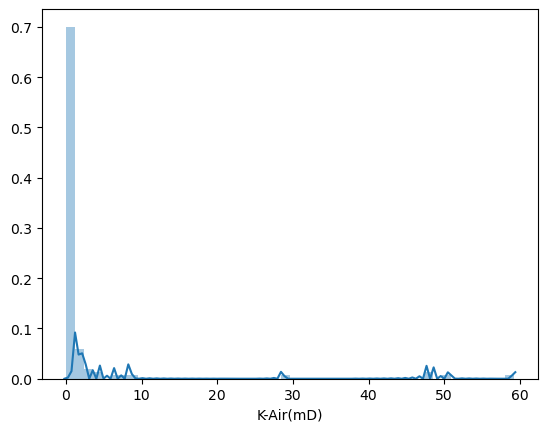

In [6]:
sns.distplot(df['K-Air(mD)'])

In [7]:
# gp = df[['Grain Density(g/cm3)','Porosity(%)']].dropna()

In [8]:
df['Grain Density(g/cm3)'] = df['Grain Density(g/cm3)'].interpolate()

In [9]:
phiz = 0.01*df['Porosity(%)']/(1-0.01*df['Porosity(%)'])

In [10]:
df['Phi_z'] = phiz

In [11]:
df.head()

,Porosity(%),Klinkenberg-K(mD),K-Air(mD),Grain Density(g/cm3),Sample,Phi_z
0,9.6,0.005,0.008,2.75,1,0.106195
1,7.0,0.002,0.004,2.72,2,0.075269
2,11.5,0.010,0.020,2.71,3,0.129944
3,8.6,0.004,0.006,2.70,4,0.094092
4,7.7,0.003,0.007,2.73,5,0.083424


In [12]:
df['RQI'] = 0.0314*np.sqrt(df['Klinkenberg-K(mD)']/(0.01*df['Porosity(%)']))

In [13]:
df.head()

,Porosity(%),Klinkenberg-K(mD),K-Air(mD),Grain Density(g/cm3),Sample,Phi_z,RQI
0,9.6,0.005,0.008,2.75,1,0.106195,0.007166
1,7.0,0.002,0.004,2.72,2,0.075269,0.005308
2,11.5,0.010,0.020,2.71,3,0.129944,0.009259
3,8.6,0.004,0.006,2.70,4,0.094092,0.006772
4,7.7,0.003,0.007,2.73,5,0.083424,0.006198


In [14]:
df['FZI'] = df['RQI']/df['Phi_z']

In [15]:
df.head()

,Porosity(%),Klinkenberg-K(mD),K-Air(mD),Grain Density(g/cm3),Sample,Phi_z,RQI,FZI
0,9.6,0.005,0.008,2.75,1,0.106195,0.007166,0.067480
1,7.0,0.002,0.004,2.72,2,0.075269,0.005308,0.070515
2,11.5,0.010,0.020,2.71,3,0.129944,0.009259,0.071257
3,8.6,0.004,0.006,2.70,4,0.094092,0.006772,0.071971
4,7.7,0.003,0.007,2.73,5,0.083424,0.006198,0.074294


In [16]:
# plt.plot(np.log(df['RQI'], np.log(df['FZI'])))

In [17]:
# !jt -r

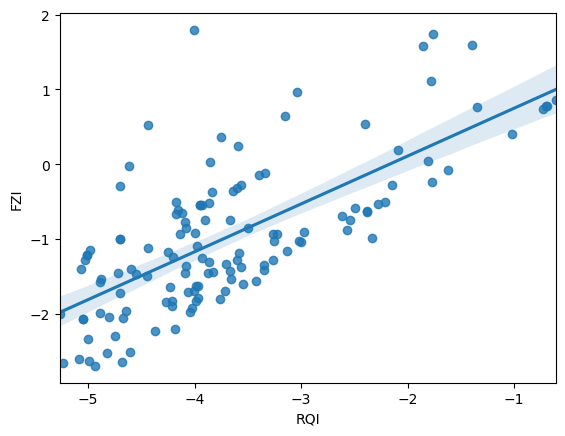

In [20]:
sns.regplot(np.log(df['RQI']),np.log(df['FZI']))

In [22]:
x = np.log(df['Phi_z'])

y = np.log(df['RQI'])

Text(0.5, 1.0, 'Log(RQI) = Log(FZI) + Log(Phi_Z)')

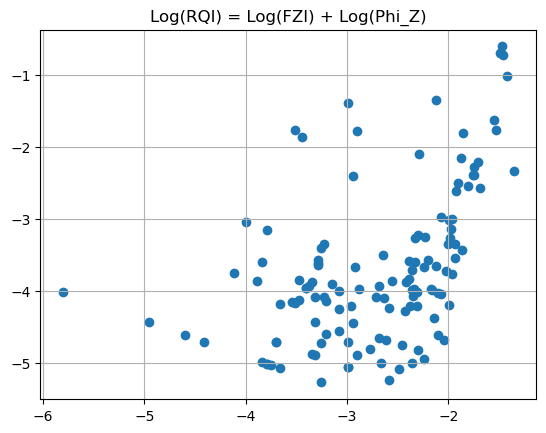

In [25]:
plt.scatter(x,y)
plt.grid()
plt.title('Log(RQI) = Log(FZI) + Log(Phi_Z)')

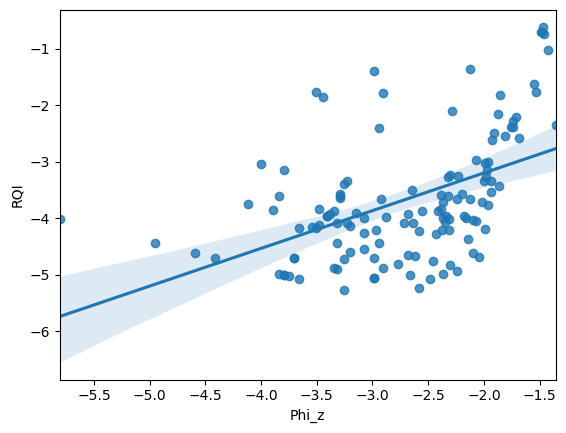

In [26]:
sns.regplot(x,y)

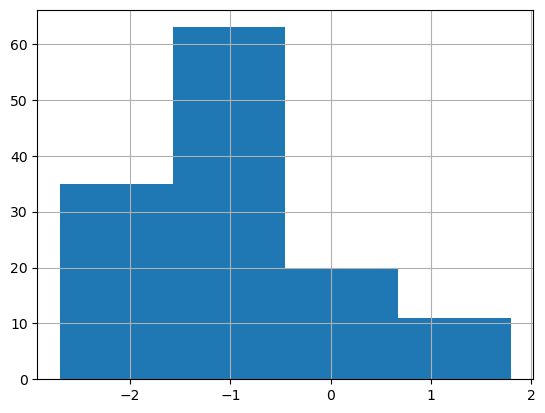

In [40]:
plt.hist(np.log(df['FZI']),bins=4)
plt.grid()

# log(FZI) Bins- 
1. <-1.5
2. -1.5 to -0.5
3. -0.5 to 0.5
4. 0.5+

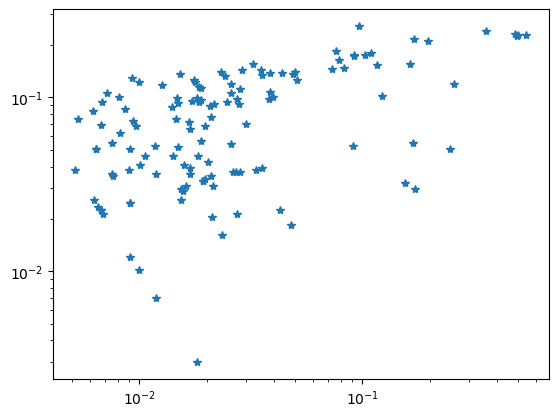

In [36]:
plt.loglog(df['RQI'],df['Phi_z'],'*')

In [37]:
cumsum = np.cumsum(np.log(df['FZI']))

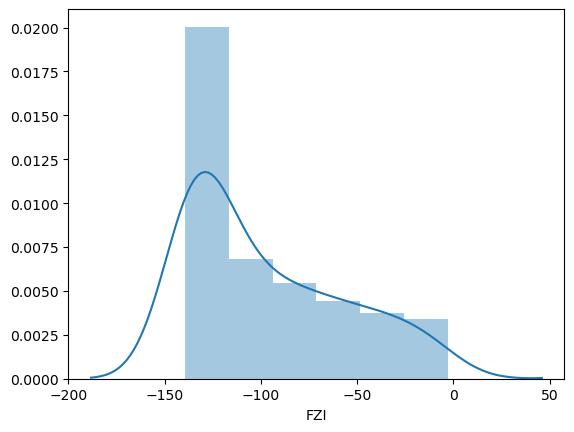

In [60]:
df['log(FZI)'] = np.log(df['FZI'])
df['log(RQI)'] = np.log(df['RQI'])
df['log(phi_z)'] = np.log(df['Phi_z'])

In [61]:
df1 = df[df['log(FZI)'] <-1.5]

In [62]:
df2 = df[(df['log(FZI)'] >= -1.5) & (df['log(FZI)'] <=-0.5)]

In [63]:
df3 = df[(df['log(FZI)'] >= -0.5) & (df['log(FZI)'] <=0.5)]

In [64]:
df4 = df[df['log(FZI)'] >0.5]

In [80]:
#line1
logRQI1 = -2 + df1['log(RQI)']


#line2
logRQI2 = -1.05 + np.log(df2['Phi_z'])


#line3
logRQI3 = -0.1 + np.log(df3['Phi_z'])

#line4

logRQI4 = 1 + np.log(df4['Phi_z'])



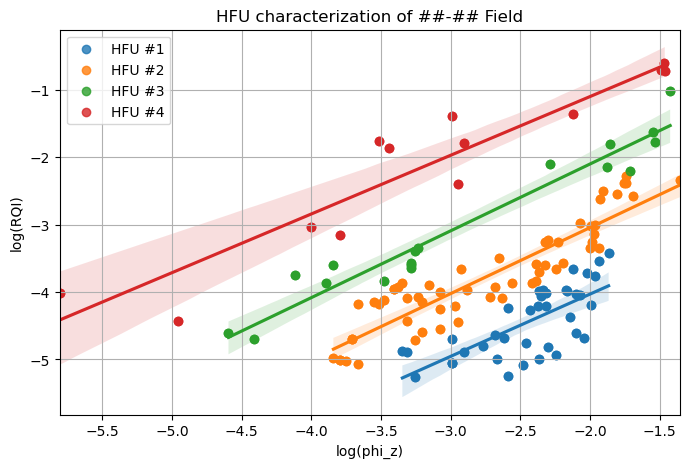

In [88]:
plt.figure(figsize=(8,5))
plt.scatter(df1['log(phi_z)'],df1['log(RQI)'])
plt.scatter(df2['log(phi_z)'],df2['log(RQI)'])
plt.scatter(df3['log(phi_z)'],df3['log(RQI)'])
plt.scatter(df4['log(phi_z)'],df4['log(RQI)'])


# plt.plot(df1['log(phi_z)'],logRQI1)


sns.regplot(df1['log(phi_z)'],df1['log(RQI)'],label='HFU #1')
sns.regplot(df2['log(phi_z)'],df2['log(RQI)'],label='HFU #2')
sns.regplot(df3['log(phi_z)'],df3['log(RQI)'],label='HFU #3')
sns.regplot(df4['log(phi_z)'],df4['log(RQI)'],label='HFU #4')

plt.title('HFU characterization of ##-## Field')


plt.legend()

plt.grid()
# plt.plot(df1['log(phi_z)'],logRQI1)